In [6]:
from qulacs import QuantumState,QuantumCircuit, Observable, PauliOperator
from qulacs.gate import X,Z,RX,RY,RZ,CNOT,merge,DenseMatrix,add
from qulacs.state import inner_product
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

[1.0, 0.9999999999999994, 0.9999999999999987, 0.9999999999999984, 0.9999999999999974, 0.9999999999999968, 0.9999999999999967, 0.9999999999999967, 0.9999999999999961, 0.9999999999999954, 0.9999999999999953, 0.9999999999999946, 0.9999999999999934, 0.9999999999999928, 0.9999999999999922, 0.9999999999999913, 0.9999999999999908, 0.99999999999999, 0.9999999999999898, 0.9999999999999891, 0.9999999999999885, 0.9999999999999875, 0.9999999999999868, 0.9999999999999865, 0.9999999999999858, 0.9999999999999848, 0.9999999999999841, 0.9999999999999833, 0.9999999999999827, 0.999999999999982, 0.9999999999999815, 0.9999999999999807, 0.9999999999999798, 0.9999999999999791, 0.9999999999999785, 0.9999999999999781, 0.9999999999999775, 0.9999999999999768, 0.9999999999999765, 0.9999999999999754, 0.9999999999999748, 0.9999999999999738, 0.9999999999999728, 0.9999999999999721, 0.9999999999999715, 0.9999999999999708, 0.99999999999997, 0.9999999999999694, 0.9999999999999688, 0.999999999999968, 0.9999999999999675, 

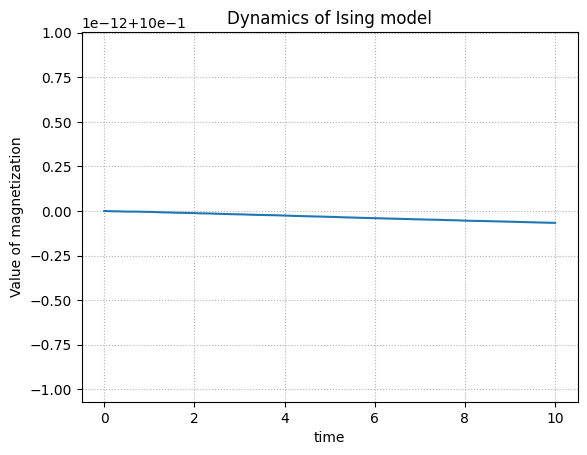

In [7]:
nqubits = 6
t = 10.0
M = 100
delta = t/M

magnetization_obs = Observable(nqubits) 
for i in range(nqubits):
     magnetization_obs.add_operator(PauliOperator("Z "+str(i), 1.0/nqubits))

state = QuantumState(nqubits)
state.set_zero_state() 

circuit_trotter_Ising = QuantumCircuit(nqubits)
for i in range(nqubits):
    circuit_trotter_Ising.add_CNOT_gate(i,(i+1)%(nqubits))
    circuit_trotter_Ising.add_RZ_gate((i+1)%nqubits,2*delta)
    circuit_trotter_Ising.add_CNOT_gate(i,(i+1)%(nqubits))

x = [i*delta for i in range(M+1)]
y = []

y.append( magnetization_obs.get_expectation_value(state) )

for i in range(M):
    circuit_trotter_Ising.update_quantum_state(state)
    y.append(magnetization_obs.get_expectation_value(state))

print(y)

plt.xlabel("time")
plt.ylabel("Value of magnetization")
plt.title("Dynamics of Ising model")
plt.plot(x, y, "-")
plt.grid(linestyle='dotted')
plt.show()

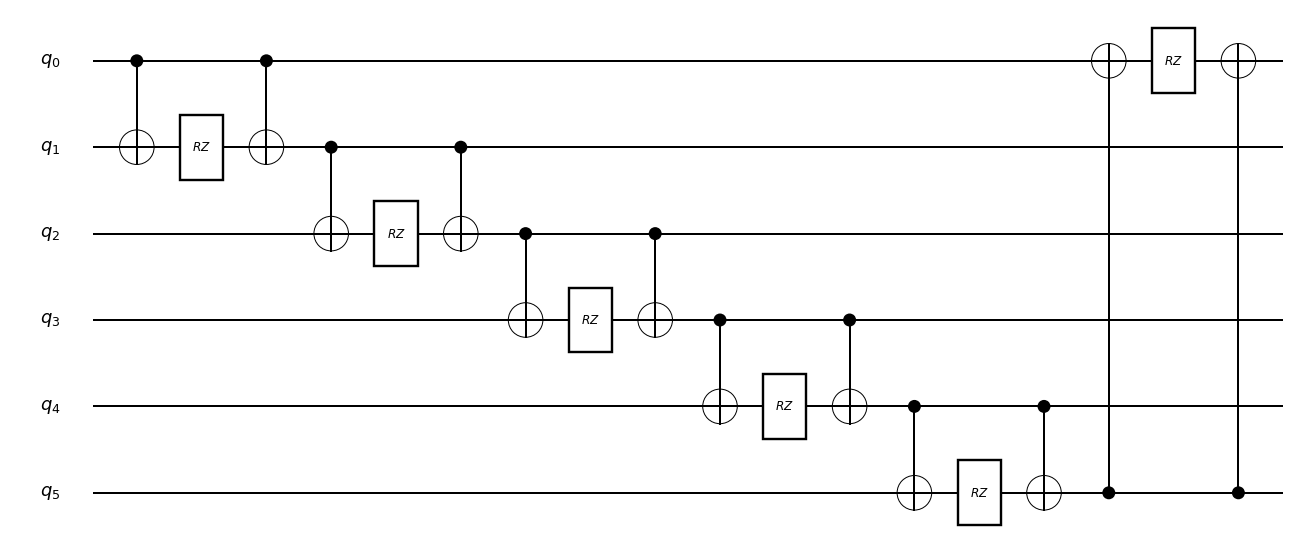

In [8]:
from qulacsvis import circuit_drawer

circuit_drawer(circuit_trotter_Ising, "mpl")

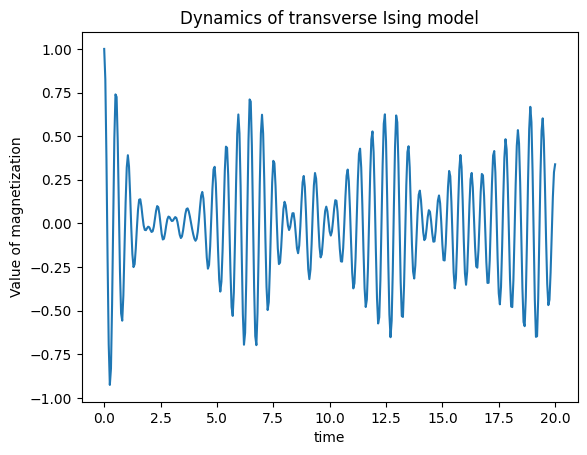

In [9]:
nqubits = 6
t = 20.0
M = 400
delta = t/M
h = 6.

magnetization_obs = Observable(nqubits) 
for i in range(nqubits):
     magnetization_obs.add_operator(PauliOperator("Z "+str(i), 1.0/nqubits))

state = QuantumState(nqubits)
state.set_zero_state() 

circuit_trotter_transIsing = QuantumCircuit(nqubits)
for i in range(nqubits):
    circuit_trotter_transIsing.add_CNOT_gate(i,(i+1)%(nqubits))
    circuit_trotter_transIsing.add_RZ_gate((i+1)%nqubits,2*delta)
    circuit_trotter_transIsing.add_CNOT_gate(i,(i+1)%(nqubits))
    circuit_trotter_transIsing.add_RX_gate(i, 2*delta*h)

x = [i*delta for i in range(M+1)]
y = []

y.append( magnetization_obs.get_expectation_value(state) )

for i in range(M):
    circuit_trotter_transIsing.update_quantum_state(state)
    y.append(magnetization_obs.get_expectation_value(state))

plt.xlabel("time")
plt.ylabel("Value of magnetization")
plt.title("Dynamics of transverse Ising model")
plt.plot(x, y, "-")
plt.show()

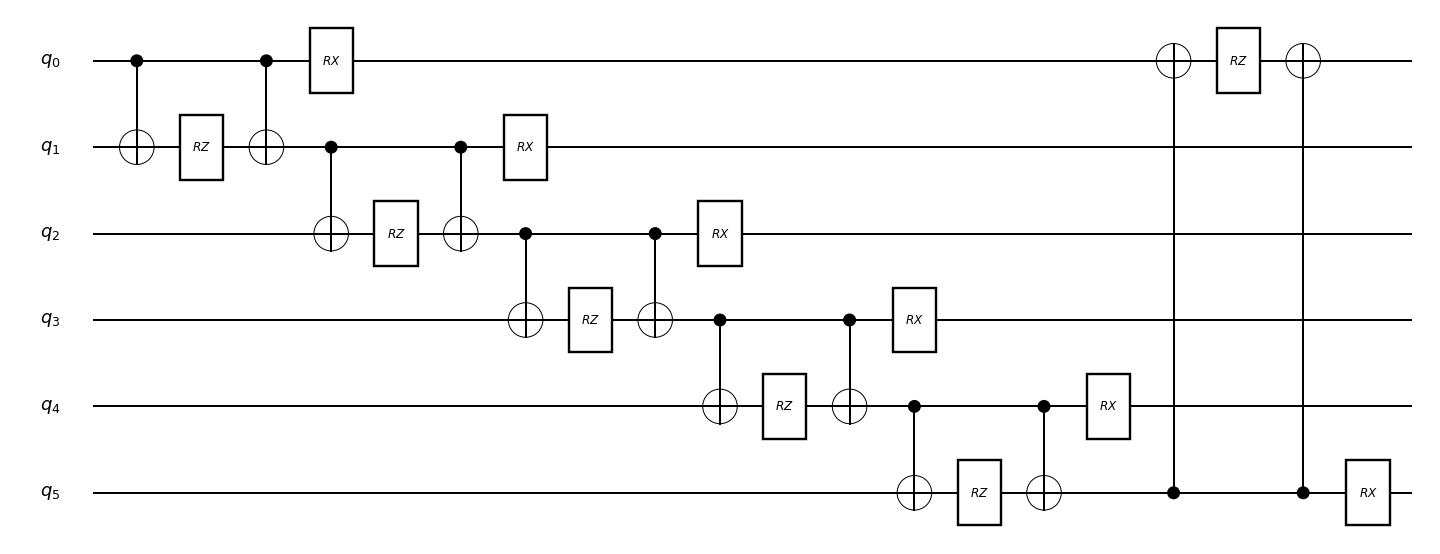

In [10]:
circuit_drawer(circuit_trotter_transIsing, "mpl")

In [11]:
from scipy.linalg import expm

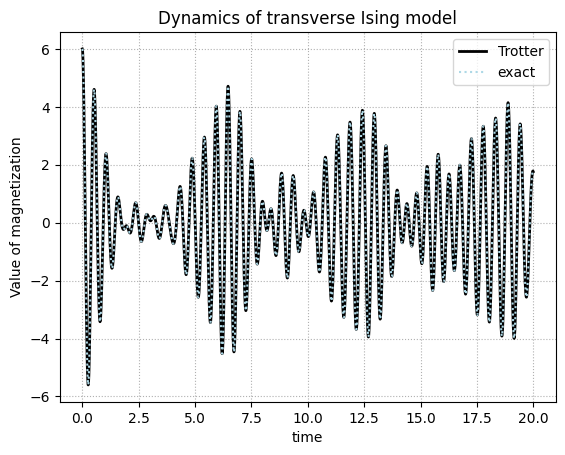

In [12]:
nqubits = 6
t = 20.0
M = 4000
delta = t/M
h = 6.

magnetization_obs = Observable(nqubits) 
for i in range(nqubits):
     magnetization_obs.add_operator(PauliOperator("Z "+str(i), 1.0))

state_trotter = QuantumState(nqubits)
state_trotter.set_zero_state() 
state_exact = QuantumState(nqubits)
state_exact.set_zero_state() 

circuit_trotter_transIsing = QuantumCircuit(nqubits)
for i in range(nqubits):
    circuit_trotter_transIsing.add_CNOT_gate(i,(i+1)%(nqubits))
    circuit_trotter_transIsing.add_RZ_gate((i+1)%nqubits,2*delta)
    circuit_trotter_transIsing.add_CNOT_gate(i,(i+1)%(nqubits))
    circuit_trotter_transIsing.add_RX_gate(i, 2*delta*h)

zz_matrix = np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
hx_matrix = h*np.array( [ [0,1], [1,0] ] )
zz = DenseMatrix([0,1], zz_matrix)
hx = DenseMatrix(0, hx_matrix)

for i in range(1, nqubits): 
    zz = add(zz, DenseMatrix([i,(i+1)%nqubits], zz_matrix))
    hx = add(hx, DenseMatrix(i, hx_matrix) ) 

ham = add(zz, hx) 
matrix = ham.get_matrix()
e_iHdelta = expm(-1.0j*delta*matrix)

circuit_exact_transIsing = QuantumCircuit(nqubits)
circuit_exact_transIsing.add_dense_matrix_gate(np.arange(nqubits), e_iHdelta)

x = [i*delta for i in range(M+1)]
y_trotter = []
y_exact = []

y_trotter.append( magnetization_obs.get_expectation_value(state_trotter) )
y_exact.append( magnetization_obs.get_expectation_value(state_exact) )

for i in range(M):
    circuit_trotter_transIsing.update_quantum_state(state_trotter)
    circuit_exact_transIsing.update_quantum_state(state_exact)
    y_trotter.append( magnetization_obs.get_expectation_value(state_trotter) )
    y_exact.append( magnetization_obs.get_expectation_value(state_exact) )

plt.xlabel("time")
plt.ylabel("Value of magnetization")
plt.title("Dynamics of transverse Ising model")
plt.plot(x, y_trotter, color='black', linewidth=2.0, label="Trotter")
plt.plot(x, y_exact, color='lightblue', linestyle='dotted', label="exact")
plt.legend()
plt.grid(linestyle='dotted')
plt.show()